In [1]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
kaggle_credentials = json.load((open("kaggle.json")))

In [7]:
os.environ["KAGGLE_USERNAME"] = kaggle_credentials["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentials["key"]

In [23]:
!kaggle datasets download tushar5harma/plant-village-dataset-updated

Dataset URL: https://www.kaggle.com/datasets/tushar5harma/plant-village-dataset-updated
License(s): CC0-1.0
^C
User cancelled operation


In [3]:
!ls


kaggle.json                        training_model_plant_disease.ipynb
PlantVillage


In [2]:
base_dir = "PlantVillage/train"

In [3]:
image_path ="PlantVillage/train/Corn_(maize)___healthy/0305800e-de91-4742-b923-f9a1c0799392___R.S_HL 8116 copy.jpg"

(256, 256, 3)


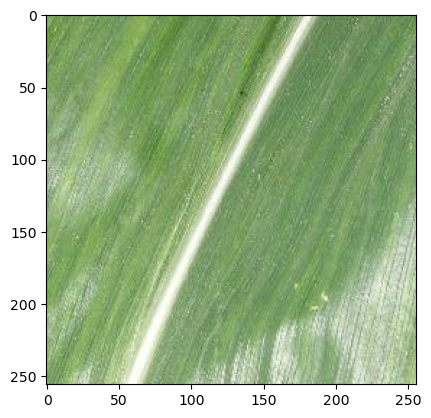

In [4]:
img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.show()

In [5]:
img_size = 224
batch_size = 32

In [6]:
data_gen = ImageDataGenerator(
    rescale  = 1/255 ,
    validation_split= 0.2
)

In [7]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size =(img_size , img_size),
    batch_size = batch_size,
    subset= "training",
    class_mode="categorical"
)

Found 34771 images belonging to 38 classes.


In [8]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 8675 images belonging to 38 classes.


In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes , activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
             loss="categorical_crossentropy",
             metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch= train_generator.samples //batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 250s 230ms/step - accuracy: 0.7228 - loss: 0.9944 - val_accuracy: 0.8354 - val_loss: 0.5279
Epoch 2/3
   1/1086 ━━━━━━━━━━━━━━━━━━━━ 3:56 218ms/step - accuracy: 0.8438 - loss: 0.5270

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1086/1086 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8438 - loss: 0.5270 - val_accuracy: 0.8200 - val_loss: 0.5718
Epoch 3/3
 918/1086 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.9076 - loss: 0.3073

In [ ]:
val_loss , val_accuracy = model.evaluate(validation_generator , steps = validation_generator.samples // batch_size)
print("validation accuracy =" , val_accuracy )

In [ ]:
def load_preprocess_image(img_path , target_size=(224,224)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = np.expand_dims(img , axis = 0)
    img = img.astype('float32')/255.
    return img

def predict_img(model, image_path, class_indices):
    processed_img = load_preprocess_image(image_path)
    predictions = model.predict(processed_img)
    predicted_class_index = np.argmax(predictions , axis = 1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

In [ ]:
json.dump(class_indices , open('class_indices.json', 'w'))

In [ ]:
image_path = "PlantVillage/train/Apple___Cedar_apple_rust/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394.JPG"
predicted_class_name = predict_img(model , image_path , class_indices)
print(predicted_class_name)

In [ ]:
model.save('plant_disease_prediction_model.h5')